# 02 - Inspect train data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("../data/train.csv")
train_data.shape

(6954, 15)

In [3]:
train_data.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,4278,4558_01,Europa,False,C/167/S,55 Cancri e,54.0,False,0.0,559.0,0.0,15238.0,2799.0,Wezna Baleful,False
1,5971,6326_01,Earth,False,F/1307/P,TRAPPIST-1e,20.0,False,0.0,20.0,1.0,696.0,0.0,Therek Hinetthews,False
2,464,0503_02,Mars,False,F/90/S,TRAPPIST-1e,43.0,False,1821.0,0.0,47.0,29.0,0.0,Torms Fone,False
3,4475,4757_01,Earth,False,F/896/S,TRAPPIST-1e,24.0,False,185.0,0.0,476.0,1810.0,53.0,Tanley Mirandry,False
4,8469,9046_01,Europa,True,C/335/S,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Alphah Cratrave,True


### Numerical features

In [4]:
num_data = train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
num_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,54.0,0.0,559.0,0.0,15238.0,2799.0
1,20.0,0.0,20.0,1.0,696.0,0.0
2,43.0,1821.0,0.0,47.0,29.0,0.0
3,24.0,185.0,0.0,476.0,1810.0,53.0
4,25.0,0.0,0.0,0.0,0.0,0.0


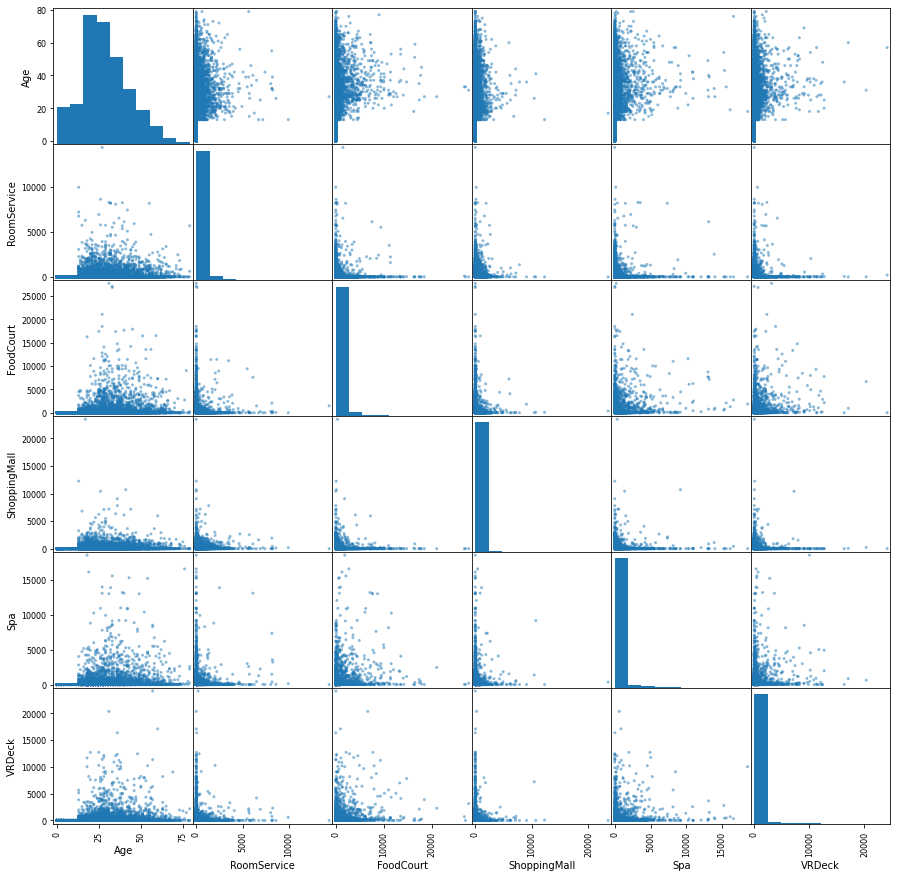

In [5]:
pd.plotting.scatter_matrix(num_data, figsize=(15, 15))
plt.show()

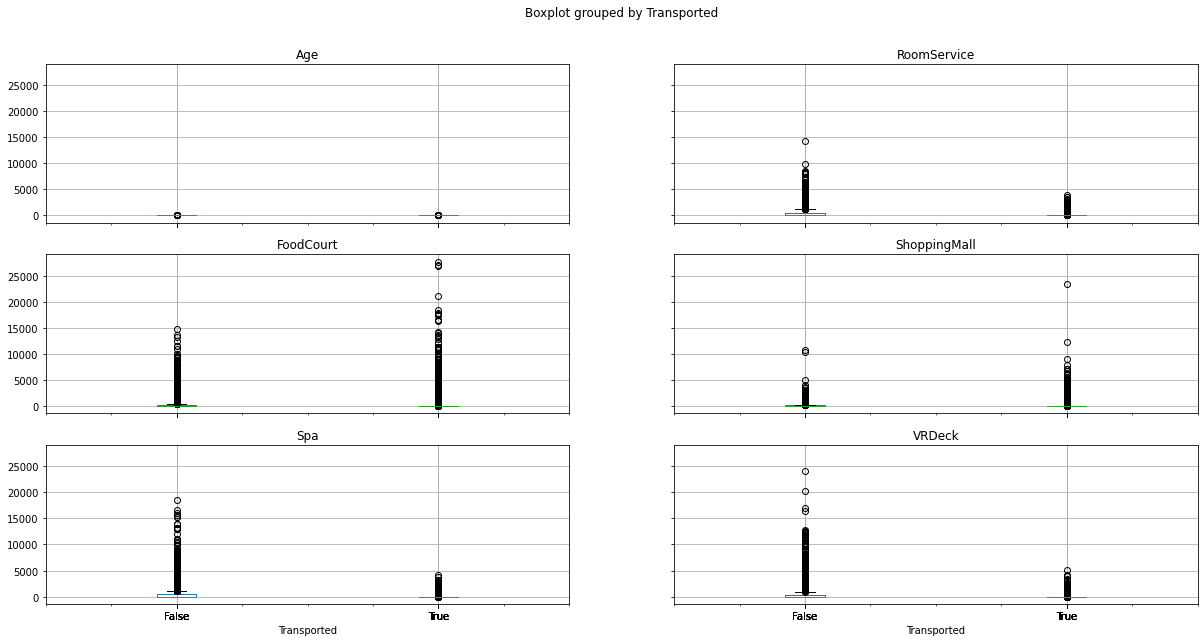

In [6]:
train_data.boxplot(column=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], by="Transported", figsize=(20, 10))
plt.show()

In [7]:
num_data.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.064941,0.130915,0.031089,0.117505,0.101655
RoomService,0.064941,1.000000,-0.010850,0.044697,0.016894,-0.016641
FoodCourt,0.130915,-0.010850,1.000000,-0.014577,0.205681,0.218462
ShoppingMall,0.031089,0.044697,-0.014577,1.000000,0.018977,-0.012388
Spa,0.117505,0.016894,0.205681,0.018977,1.000000,0.161072
VRDeck,0.101655,-0.016641,0.218462,-0.012388,0.161072,1.000000


In [8]:
total_bill = num_data[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].apply(np.sum, axis=1)
num_data = num_data.assign(TotalBill = total_bill)
num_data.corr()["TotalBill"]

Age             0.183773
RoomService     0.255711
FoodCourt       0.732658
ShoppingMall    0.235184
Spa             0.591394
VRDeck          0.583851
TotalBill       1.000000
Name: TotalBill, dtype: float64

### Categorical features

In [9]:
cat_data = train_data[["HomePlanet", "CryoSleep", "Destination", "VIP"]]
cat_data.head()

,HomePlanet,CryoSleep,Destination,VIP
0,Europa,False,55 Cancri e,False
1,Earth,False,TRAPPIST-1e,False
2,Mars,False,TRAPPIST-1e,False
3,Earth,False,TRAPPIST-1e,False
4,Europa,True,55 Cancri e,False


In [10]:
cat_data.nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
dtype: int64

In [11]:
df = train_data[["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"]] \
    .melt(id_vars="Transported") \
        .value_counts() \
            .reorder_levels(["variable", "value", "Transported"])
pd.DataFrame(df, columns=["counts"]).sort_index()

counts
variable    value         Transported        
CryoSleep   False         False          2927
                          True           1432
            True          False           438
                          True           1987
Destination 55 Cancri e   False           552
                          True            880
            PSO J318.5-22 False           302
                          True            320
            TRAPPIST-1e   False          2523
                          True           2228
HomePlanet  Earth         False          2091
                          True           1560
            Europa        False           580
                          True           1128
            Mars          False           701
                          True            738
VIP         False         False          3268
                          True           3351
            True          False           102
                          True             57

### Other features

In [12]:
other_data = train_data[["PassengerId", "Name", "Cabin"]]
other_data.head()

,PassengerId,Name,Cabin
0,4558_01,Wezna Baleful,C/167/S
1,6326_01,Therek Hinetthews,F/1307/P
2,0503_02,Torms Fone,F/90/S
3,4757_01,Tanley Mirandry,F/896/S
4,9046_01,Alphah Cratrave,C/335/S


In [13]:
other_data["PassengerId"].str.extract(r"^(.*)_").nunique()

0    5219
dtype: int64

<AxesSubplot:xlabel='0'>

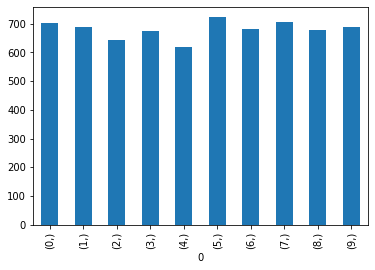

In [14]:
other_data["Cabin"].str.extract(r"^(.)*/").value_counts().sort_index().plot(kind="bar")